In [172]:
# THIS IS THE MAIN FILE FOR THE ROCKET SIMULATION

#importing modules
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [173]:
#THIS FILE IS FOR CALCULATING THE THRUST

def GetThrust(state,Mdata,k):
    #Takes an input t (time) and returns the thrust (N)
    if state['t'][k] <= Mdata['burnTime']:
        Th = Mdata['initialThrust']  #constant thrust during fuel burn
    else:
        Th = 0;      #no thrust when all of the fuel is gone

    return Th

In [174]:
#THIS FILE IS FOR CALCULATING THE DRAG

def GetDrag(state,Mdata):
#takes the velocity as input and outputs the drag force (N)

    v = state['v']        #obtaining the velocity
    k = Mdata['dragConstant']

    #calculating the drag
    D = -k*v*abs(v)

    return D

In [175]:
#THIS FILE IS FOR CALCULATING THE MASS

def GetMass(state,Mdata,k):
    #Takes an input of time and outputs the mass
    # M(t) = M_i - c*(t-t_burn)

    #getting the initial masses
    M_i = Mdata['initialMass']        #initial mass of rocket
    M_f = Mdata['finalMass']          #final mass of the rocket
    c = Mdata['burnRate']

    #outputting the mass
    if (state['t'][k] <= Mdata['burnTime']):
        m = M_i - c*(state['t'][k])
    else:
        m = M_f
        
    return m

In [176]:
#THIS FILE IS FOR CALCULATING THE ACCELERATION

def GetAcceleration(state,Mdata,k):
    #input the state for thrust (times), k the times, and Mdata for constants

    #getting the variables

    g = Mdata['g']
    m = GetMass(state,Mdata,k)

    D = GetDrag(state,Mdata)              #calling the drag function
    Th = GetThrust(state,Mdata,k)       #calling the thrust function

    #calculating the force acting the rocket -> resolving vertically upwards
    f = Th - m*(Mdata['GM']/(Mdata['R_e']+state['h'])**2) - D

    #using newton's 2nd law to find a
    a = f/m

    return a
    #return m

In [177]:
#This Function plots the Graphs

def PlotGraph(H,V,A,M,t):
    plt.figure(figsize=(15,15))
    
    plt.subplot(4,1,1)
    plt.xlabel('Time (s)')
    plt.ylabel('Height (m)')
    plt.plot(t,H[0,:],'r')
    plt.grid()
    
    plt.subplot(4,1,2)
    plt.xlabel('Time (s)')
    plt.ylabel('Velocity (m/s)')
    plt.plot(t,V[0,:],'b')
    plt.grid()
    
    plt.subplot(4,1,3)
    plt.xlabel('Time (s)')
    plt.ylabel('Acceleration (m/s^2)') 
    plt.plot(t,A[0,:],'g')
    plt.grid()
    
    plt.subplot(4,1,4)
    plt.xlabel('Time (s)')
    plt.ylabel('Mass of Fuel Left (kg)')
    plt.plot(t,M[0,:],'k')
    plt.grid()
    

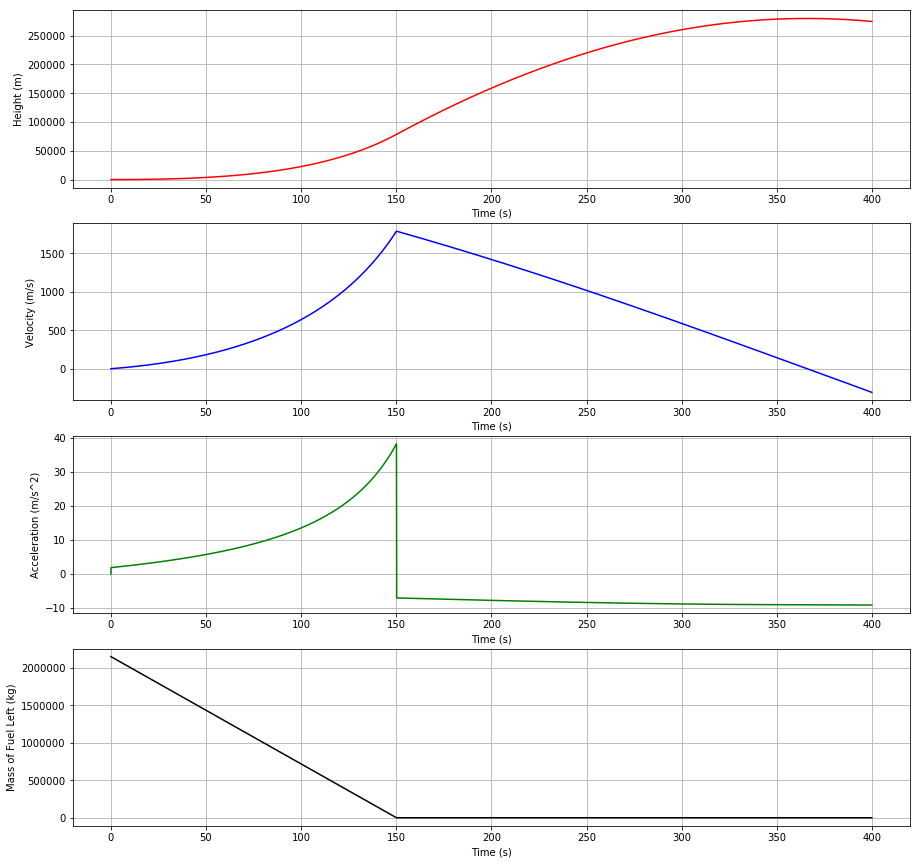

In [178]:
#model paramters
Mdata = {
        'initialMass': 2.9e6,                                              #kg
        'initialFuelMass': 2.15e6,                                         #kg
        'burnTime': 150,                                                   #seconds
        'initialThrust': 34e6,                                             #Newtons
        'dragConstant': 0.6,                                               #Ns^2/m^2
        'GravConstant': 6.67804e-11,                                       #N/m^2/kg^2 
        'M_e': 5.972e24,                                                   # kg
        'GM': Mdata['GravConstant'] * Mdata['M_e'],
        'R_e': 6371e3,                                                     # m
        'g': 9.81,                                                         #Acceleration due to gravity in m/s^2
        'burnRate': Mdata['initialFuelMass']/Mdata['burnTime'],            #kg/s
        'finalMass': Mdata['initialMass'] - Mdata['initialFuelMass']       #kg
}

Mdata['M_e']

#Initialise the values
a = 0     #initial acceleration (m/s^2)
v = 0;    #initial velocity (m/s)
h = 0;    #initial height (m)

#time values
tstart = 0
tend = 400

#setting the time step / delta t size
dt = 0.1

#making lists to store the data for the plot
t = np.arange(tstart,tend,dt)
n = len(t)       #getting the length of t
A = np.zeros((1,n))
V = np.zeros((1,n))
H = np.zeros((1,n))
M = np.zeros((1,n))         #for masses

#Making the state dictionary
state = {
    't': t,
    'h': h,
    'v': v
}

#repeat for each time step
for k in range(0,n):
    
    #store current values for plotting later
    H[0,k] = state['h']
    V[0,k] = state['v']
    A[0,k] = a
    
    #calculate the acceleration and mass
    M[0,k] = GetMass(state,Mdata,k)
    a = GetAcceleration(state,Mdata,k)
    
    #use Euler's method to find the height at the next step
    state['h'] = state['h'] + dt*state['v'];

    #use Euler's method to find the velocity at the next step
    state['v'] = state['v'] + dt*a;

#PLOTTING THE DATA
M_fuel = M - Mdata['finalMass']*np.ones((1,n))
PlotGraph(H,V,A,M_fuel,t)